## Problem 1: Bank Account Revisited

In [1]:
from enum import Enum
class AccountType(Enum):
    SAVINGS = 1
    CHECKING = 2

### Part 1: Create a BankAccount class with the following specification:
Constructor is `BankAccount(self, owner, accountType)` where `owner` is a string representing the name of the account owner and `accountType` is one of the AccountType enums

Methods `withdraw(self, amount)` and `deposit(self, amount)` to modify the account balance of the account

Override methods `__str__` to write an informative string of the account owner and the type of account, and `__len__` to return the balance of the account

In [2]:
class BankAccount:
    def __init__(self, owner, accountType):
        self.owner = owner
        self.accountType = accountType.name
        self.balance = 0
    
    def withdraw(self, amount):
        if amount > self.balance:
            raise ValueError("insufficient funds")
        self.balance -= amount
    
    def deposit(self, amount):
        self.balance += amount
    
    def __str__(self):
        return "{} has a {} account with balance of {}".format(self.owner, self.accountType, self.balance)

    def __len__(self):
        return self.balance

In [3]:
b = BankAccount("Jun", AccountType.CHECKING)
b.deposit(100)
b.withdraw(50)
print(b)
print(b.accountType)
print(len(b))
print(str(b))

Jun has a CHECKING account with balance of 50
CHECKING
50
Jun has a CHECKING account with balance of 50


### Part 2:  Write a class BankUser with the following specification:

Constructor `BankUser(self, owner)` where `owner` is the name of the account.

Method `addAccount(self, accountType)` - to start, a user will have no accounts when the BankUser object is created. `addAccount` will add a new account to the user of the `accountType` specified. **Only one savings/checking account per user, return appropriate error otherwise**

Methods `getBalance(self, accountType)`, `deposit(self, accountType, amount)`, and `withdraw(self, accountType, amount)` for a specific AccountType.

Override `__str__` to have an informative summary of user's accounts.

Write some simple tests to make sure this is working. Think of edge scenarios a user might try to do.

In [4]:
class BankUser:
    def __init__(self, owner):
        self.owner = owner
        self.checking = 0
        self.savings = 0
        self.accountType = None
        self.accountDict = {AccountType.CHECKING: 0, AccountType.SAVINGS: 0}
    
    def addAccount(self, accountType):
        self.accountType = accountType
        self.accountDict[self.accountType] += 1
        if self.accountDict[self.accountType] > 1:
            raise ValueError("You already have an account.")
    
    def getBalance(self, accountType):
        if accountType == AccountType.CHECKING:
            return self.checking
        else:
            return self.savings
    
    def deposit(self, accountType, amount):
        if accountType == AccountType.CHECKING:
            self.checking += amount
        else:
            self.savings += amount
    
    def withdraw(self, accountType, amount):
        if accountType == AccountType.CHECKING:
            if amount > self.checking:
                raise ValueError("insufficient funds")
            self.checking -= amount
        else:
            if amount > self.savings:
                raise ValueError("insufficient funds")
            self.savings -= amount
    
    def __str__(self):
        S1 = ""
        S2 = ""
        if self.accountDict[AccountType.CHECKING] == 1:
            S1 = "{}: your checking account has ${}\n".format(self.owner, self.checking)
        if self.accountDict[AccountType.SAVINGS] == 1:
            S2 = "{}: your savings account has ${}".format(self.owner, self.savings)
        return S1 + S2

        

In [5]:
bb = BankUser("yijun")
bb.addAccount(AccountType.SAVINGS)
print(bb)
bb.deposit(AccountType.SAVINGS, 60)
print(bb)
bb.addAccount(AccountType.CHECKING)
print(bb)
bb.deposit(AccountType.CHECKING, 100)
print(bb)

yijun: your savings account has $0
yijun: your savings account has $60
yijun: your checking account has $0
yijun: your savings account has $60
yijun: your checking account has $100
yijun: your savings account has $60


### Part 3:  ATM Closure

Finally, we are going to rewrite a closure to use our bank account. We will make use of the [input function](http://anh.cs.luc.edu/python/hands-on/3.1/handsonHtml/io.html) which takes user input to decide what actions to take.

Write a closure called ATMSession(bankUser) which takes in a BankUser object. Return a method called Interface that when called, would provide the following interface:

First screen for user will look like:


**Enter Option:**

**1)Exit**

**2)Create Account**

**3)Check Balance**

**4)Deposit**

**5)Withdraw**


Pressing 1 will exit, any other option will show the options:



**Enter Option:**

**1)Checking**

**2)Savings**


If a deposit or withdraw was chosen, then there must be a third screen:



**Enter Integer Amount, Cannot Be Negative:**

This is to keep the code relatively simple, if you'd like you can also curate the options depending on the BankUser object (for example, if user has no accounts then only show the Create Account option), but this is up to you. In any case, you must handle any input from the user in a reasonable way that an actual bank would be okay with, and give the user a proper response to the action specified.

Upon finishing a transaction or viewing balance, it should go back to the original screen

In [6]:
def ATMSession(bankUser):
    
    def interface():
        command1 = int(input("Enter Option:\n1)Exit\n2)Create Account\n3)Check Balance\n4)Deposit\n5)Withdraw\n"))

        while command1 != 1:

            if command1 == 2:
                command2 = int(input("Creat Account -- Enter Option:\n1)Checking\n2)Savings\n"))
                if command2 == 1:
                    bankUser.addAccount(AccountType.CHECKING)
                elif command2 == 2:
                    bankUser.addAccount(AccountType.SAVINGS)
                else:
                    print("Please enter a valid command")
                command1 = int(input("Enter Option:\n1)Exit\n2)Create Account\n3)Check Balance\n4)Deposit\n5)Withdraw\n"))

            elif command1 == 3:
                command2 = int(input("Check Balance -- Enter Option:\n1)Checking\n2)Savings\n"))
                if command2 == 1:
                    if bankUser.accountDict[AccountType.CHECKING] == 0:
                        print("You do not have a checking account yet. Choose another option.")
                    else:
                        print(bankUser)
                elif command2 == 2:
                    if bankUser.accountDict[AccountType.SAVINGS] == 0:
                        print("You do not have a savings account yet. Choose another option.")
                    else:
                        print(bankUser)
                else:
                    print("Please enter a valid command")
                command1 = int(input("Enter Option:\n1)Exit\n2)Create Account\n3)Check Balance\n4)Deposit\n5)Withdraw\n"))

            elif command1 == 4:
                command2 = int(input("Deposit -- Enter Option:\n1)Checking\n2)Savings\n"))
                if command2 == 1:
                    if bankUser.accountDict[AccountType.CHECKING] == 0:
                        print("You do not have a checking account yet. Choose another option.")
                    else:
                        amount = int(input("Enter Integer Amount, Cannot Be Negative:"))
                        bankUser.deposit(AccountType.CHECKING, amount)
                        print(bankUser)
                elif command2 == 2:
                    if bankUser.accountDict[AccountType.SAVINGS] == 0:
                        print("You do not have a savings account yet. Choose another option.")
                    else:
                        amount = int(input("Enter Integer Amount, Cannot Be Negative:"))
                        bankUser.deposit(AccountType.SAVINGS, amount)
                        print(bankUser)
                else:
                    print("Please enter a valid command")
                command1 = int(input("Enter Option:\n1)Exit\n2)Create Account\n3)Check Balance\n4)Deposit\n5)Withdraw\n"))

            elif command1 == 5:
                command2 = int(input("Withdraw -- Enter Option:\n1)Checking\n2)Savings\n"))
                if command2 == 1:
                    if bankUser.accountDict[AccountType.CHECKING] == 0:
                        print("You do not have a checking account yet. Choose another option.")
                    else:
                        amount = int(input("Enter Integer Amount, Cannot Be Negative:"))
                        bankUser.withdraw(AccountType.CHECKING, amount)
                        print(bankUser)
                elif command2 == 2:
                    if bankUser.accountDict[AccountType.SAVINGS] == 0:
                        print("You do not have a savings account yet. Choose another option.")
                    else:
                        amount = int(input("Enter Integer Amount, Cannot Be Negative:"))
                        bankUser.withdraw(AccountType.SAVINGS, amount)
                        print(bankUser)
                else:
                    print("Please enter a valid command")
                command1 = int(input("Enter Option:\n1)Exit\n2)Create Account\n3)Check Balance\n4)Deposit\n5)Withdraw\n"))
            else:
                print("Please enter a valid command")
                command1 = int(input("Enter Option:\n1)Exit\n2)Create Account\n3)Check Balance\n4)Deposit\n5)Withdraw\n"))
        print("Goodbye!")
        
    return interface

In [7]:
a = ATMSession(BankUser("YIJUN"))

In [8]:
a()

Enter Option:
1)Exit
2)Create Account
3)Check Balance
4)Deposit
5)Withdraw
2
Creat Account -- Enter Option:
1)Checking
2)Savings
1
Enter Option:
1)Exit
2)Create Account
3)Check Balance
4)Deposit
5)Withdraw
3
Check Balance -- Enter Option:
1)Checking
2)Savings
1
YIJUN: your checking account has $0

Enter Option:
1)Exit
2)Create Account
3)Check Balance
4)Deposit
5)Withdraw
4
Deposit -- Enter Option:
1)Checking
2)Savings
1
Enter Integer Amount, Cannot Be Negative:100
YIJUN: your checking account has $100

Enter Option:
1)Exit
2)Create Account
3)Check Balance
4)Deposit
5)Withdraw
5
Withdraw -- Enter Option:
1)Checking
2)Savings
2
You do not have a savings account yet. Choose another option.
Enter Option:
1)Exit
2)Create Account
3)Check Balance
4)Deposit
5)Withdraw
5
Withdraw -- Enter Option:
1)Checking
2)Savings
1
Enter Integer Amount, Cannot Be Negative:30
YIJUN: your checking account has $70

Enter Option:
1)Exit
2)Create Account
3)Check Balance
4)Deposit
5)Withdraw
1
Goodbye!


### Part 4:  Put everything in a module Bank.py

We will be grading this problem with a test suite. Put the enum, classes, and closure in a single file named Bank.py. It is very important that the class and method specifications we provided are used (with the same capitalization), otherwise you will receive no credit.

In [9]:
%%file Bank.py
from enum import Enum
class AccountType(Enum):
    SAVINGS = 1
    CHECKING = 2
    
class BankAccount:
    def __init__(self, owner, accountType):
        self.owner = owner
        self.accountType = accountType.name
        self.balance = 0
    
    def withdraw(self, amount):
        if amount > self.balance:
            raise ValueError("insufficient funds")
        self.balance -= amount
    
    def deposit(self, amount):
        self.balance += amount
    
    def __str__(self):
        return "{} has a {} account with balance of {}".format(self.owner, self.accountType, self.balance)

    def __len__(self):
        return self.balance


class BankUser:
    def __init__(self, owner):
        self.owner = owner
        self.checking = 0
        self.savings = 0
        self.accountType = None
        self.accountDict = {AccountType.CHECKING: 0, AccountType.SAVINGS: 0}
    
    def addAccount(self, accountType):
        self.accountType = accountType
        self.accountDict[self.accountType] += 1
        if self.accountDict[self.accountType] > 1:
            raise ValueError("You already have an account.")
    
    def getBalance(self, accountType):
        if accountType == AccountType.CHECKING:
            return self.checking
        else:
            return self.savings
    
    def deposit(self, accountType, amount):
        if accountType == AccountType.CHECKING:
            self.checking += amount
        else:
            self.savings += amount
    
    def withdraw(self, accountType, amount):
        if accountType == AccountType.CHECKING:
            if amount > self.checking:
                raise ValueError("insufficient funds")
            self.checking -= amount
        else:
            if amount > self.savings:
                raise ValueError("insufficient funds")
            self.savings -= amount
    
    def __str__(self):
        S1 = ""
        S2 = ""
        if self.accountDict[AccountType.CHECKING] == 1:
            S1 = "{}: your checking account has ${}\n".format(self.owner, self.checking)
        if self.accountDict[AccountType.SAVINGS] == 1:
            S2 = "{}: your savings account has ${}".format(self.owner, self.savings)
        return S1 + S2
    

def ATMSession(bankUser):
    
    def interface():
        command1 = int(input("Enter Option:\n1)Exit\n2)Create Account\n3)Check Balance\n4)Deposit\n5)Withdraw\n"))

        while command1 != 1:

            if command1 == 2:
                command2 = int(input("Creat Account -- Enter Option:\n1)Checking\n2)Savings\n"))
                if command2 == 1:
                    bankUser.addAccount(AccountType.CHECKING)
                elif command2 == 2:
                    bankUser.addAccount(AccountType.SAVINGS)
                else:
                    print("Please enter a valid command")
                command1 = int(input("Enter Option:\n1)Exit\n2)Create Account\n3)Check Balance\n4)Deposit\n5)Withdraw\n"))

            elif command1 == 3:
                command2 = int(input("Check Balance -- Enter Option:\n1)Checking\n2)Savings\n"))
                if command2 == 1:
                    if bankUser.accountDict[AccountType.CHECKING] == 0:
                        print("You do not have a checking account yet. Choose another option.")
                    else:
                        print(bankUser)
                elif command2 == 2:
                    if bankUser.accountDict[AccountType.SAVINGS] == 0:
                        print("You do not have a savings account yet. Choose another option.")
                    else:
                        print(bankUser)
                else:
                    print("Please enter a valid command")
                command1 = int(input("Enter Option:\n1)Exit\n2)Create Account\n3)Check Balance\n4)Deposit\n5)Withdraw\n"))

            elif command1 == 4:
                command2 = int(input("Deposit -- Enter Option:\n1)Checking\n2)Savings\n"))
                if command2 == 1:
                    if bankUser.accountDict[AccountType.CHECKING] == 0:
                        print("You do not have a checking account yet. Choose another option.")
                    else:
                        amount = int(input("Enter Integer Amount, Cannot Be Negative:"))
                        bankUser.deposit(AccountType.CHECKING, amount)
                        print(bankUser)
                elif command2 == 2:
                    if bankUser.accountDict[AccountType.SAVINGS] == 0:
                        print("You do not have a savings account yet. Choose another option.")
                    else:
                        amount = int(input("Enter Integer Amount, Cannot Be Negative:"))
                        bankUser.deposit(AccountType.SAVINGS, amount)
                        print(bankUser)
                else:
                    print("Please enter a valid command")
                command1 = int(input("Enter Option:\n1)Exit\n2)Create Account\n3)Check Balance\n4)Deposit\n5)Withdraw\n"))

            elif command1 == 5:
                command2 = int(input("Withdraw -- Enter Option:\n1)Checking\n2)Savings\n"))
                if command2 == 1:
                    if bankUser.accountDict[AccountType.CHECKING] == 0:
                        print("You do not have a checking account yet. Choose another option.")
                    else:
                        amount = int(input("Enter Integer Amount, Cannot Be Negative:"))
                        bankUser.withdraw(AccountType.CHECKING, amount)
                        print(bankUser)
                elif command2 == 2:
                    if bankUser.accountDict[AccountType.SAVINGS] == 0:
                        print("You do not have a savings account yet. Choose another option.")
                    else:
                        amount = int(input("Enter Integer Amount, Cannot Be Negative:"))
                        bankUser.withdraw(AccountType.SAVINGS, amount)
                        print(bankUser)
                else:
                    print("Please enter a valid command")
                command1 = int(input("Enter Option:\n1)Exit\n2)Create Account\n3)Check Balance\n4)Deposit\n5)Withdraw\n"))
            else:
                print("Please enter a valid command")
                command1 = int(input("Enter Option:\n1)Exit\n2)Create Account\n3)Check Balance\n4)Deposit\n5)Withdraw\n"))
        print("Goodbye!")
        
    return interface

Overwriting Bank.py


## Problem 2:  Linear Regression Class

Consider the multivariate linear model:

$$y = X\beta + \epsilon$$

where $y$ is a length $n$ vector, $X$ is an $m \times p$ matrix, and $\beta$
is a $p$ length vector of coefficients.

#### Ordinary Least Squares Linear Regression

[OLS Regression](https://en.wikipedia.org/wiki/Ordinary_least_squares) seeks to minimize the following cost function:

$$\|y - \beta\mathbf {X}\|^{2}$$

The best fit coefficients can be obtained by:

$$\hat{\beta} = (X^T X)^{-1}X^Ty$$

where $X^T$ is the transpose of the matrix $X$ and $X^{-1}$ is the inverse of the matrix $X$.

#### Ridge Regression

[Ridge Regression](https://en.wikipedia.org/wiki/Tikhonov_regularization) introduces an L2 regularization term to the cost function:

$$\|y - \beta\mathbf {X}\|^{2}+\|\Gamma \mathbf {x} \|^{2}$$

Where $\Gamma = \alpha I$ for some constant $\alpha$ and the identity matrix $I$.

The best fit coefficients can be obtained by:
$$\hat{\beta} = (X^T X+\Gamma^T\Gamma)^{-1}X^Ty$$

#### Lasso Regression

[Lasso Regression](https://en.wikipedia.org/wiki/Lasso_%28statistics%29) introduces an L1 regularization term and restricts the total number of predictor variables in the model.
The following cost function:
$${\displaystyle \min _{\beta _{0},\beta }\left\{{\frac {1}{m}}\left\|y-\beta _{0}-X\beta \right\|_{2}^{2}\right\}{\text{ subject to }}\|\beta \|_{1}\leq \alpha.}$$

does not have a nice closed form solution. For the sake of this exercise, you may use the [sklearn.linear_model.Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) class, which uses a coordinate descent algorithm to find the best fit. You should only use the class in the fit() method of this exercise (ie. do not re-use the sklearn for other methods in your class).

#### $R^2$ score

The $R^2$ score is defined as:
$${R^{2} = {1-{SS_E \over SS_T}}}$$

Where:

$$SS_T=\sum_i (y_i-\bar{y})^2, SS_R=\sum_i (\hat{y_i}-\bar{y})^2, SS_E=\sum_i (y_i - \hat{y_i})^2$$

where  ${y_i}$ are the original data values, $\hat{y_i}$ are the predicted values, and $\bar{y_i}$ is the mean of the original data values.

### Part 1:  Base Class
Write a class called `Regression` with the following methods:

$fit(X, y)$: Fits linear model to $X$ and $y$.

$get\_params()$: Returns $\hat{\beta}$ for the fitted model. The parameters should be stored in a dictionary.

$predict(X)$: Predict new values with the fitted model given $X$.

$score(X, y)$: Returns $R^2$ value of the fitted model.

$set\_params()$: Manually set the parameters of the linear model.

This parent class should throw a `NotImplementedError` for methods that are intended to be implemented by subclasses.

In [10]:
import numpy as np
class Regression:
    def __init__(self):
        self.params = {}
    
    def fit(self, X, y):
        raise NotImplementedError
    
    def get_params(self):
        raise NotImplementedError
    
    def predict(self, X):
        betas = self.get_params().get("beta")
        errors = self.get_params().get("intercept")
        return X.dot(betas) + errors
    
    def score(self, X, y):
        y_mean = np.mean(y)
        SST = np.linalg.norm(y - y_mean)**2
        y_hat = self.predict(X)
        SSE = np.linalg.norm(y - y_hat)**2
        return 1-SSE/SST
    
    def set_params(self, name, value):
        self.params[name] = value

### Part 2: OLS Linear Regression

Write a class called `OLSRegression` that implements the OLS Regression model described above and inherits the `Regression` class.

In [11]:
class OLSRegression(Regression):
    def __init__(self):
        super().__init__()
          
    def fit(self, X, y):
#         betas = (np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y))
#         errors = y - X.dot(betas)
#         self.params["beta"] = betas
#         self.params["intercept"] = np.mean(errors)
        X = np.insert(X, 0, 1, axis =1)
        betas = (np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y))
        self.params["beta"] = betas[1:]
        self.params["intercept"] = betas[0]
    
    def get_params(self):
        return self.params

### Part 3: Ridge Regression

Write a class called `RidgeRegression` that implements Ridge Regression and inherits the `OLSRegression` class.

In [12]:
class RidgeRegression(OLSRegression):
    def __init__(self, alpha):
        super().__init__()
        self.params["alpha"] = alpha
    
    def fit(self, X, y):
#         alpha = self.params["alpha"]
#         gamma = alpha * np.identity(X.shape[1])
#         betas = np.linalg.inv( (X.T).dot(X) + (gamma.T).dot(gamma) ).dot(X.T).dot(y)
#         errors = y - X.dot(betas)
#         self.params["beta"] = betas
#         self.params["intercept"] = np.mean(errors)
        alpha = self.params["alpha"]
        X = np.insert(X, 0, 1, axis =1)        
        gamma = alpha * np.identity(X.shape[1])
        betas = np.linalg.pinv( (X.T).dot(X) + (gamma.T).dot(gamma) ).dot(X.T).dot(y)
        self.params["beta"] = betas[1:]
        self.params["intercept"] = betas[0]
        
    
    def get_params(self):
        return self.params

### Part 3: Lasso Regression

Write a class called `LassoRegression` that implements Lasso Regression and inherits the `OLSRegression` class. You should only use Lasso(), Lasso.fit(), Lasso.coef_, and Lasso._intercept from the `sklearn.linear_model.Lasso` class.

In [13]:
from sklearn.linear_model import Lasso
class LassoRegression(OLSRegression):
    def __init__(self, alpha):
        super().__init__()
        self.params["alpha"] = alpha
        
    def fit(self, X, y):
        lasso = Lasso(alpha = self.params["alpha"])
        self.params["beta"] = lasso.fit(X, y).coef_
        self.params["intercept"] = lasso.fit(X, y).intercept_
        
    def get_params(self):
        return self.params

### Part 4: Model Scoring
You will use the [Boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) for this part.

Instantiate each of the three models above.  Using a for loop, fit (on the training data) and score (on the testing data) each model on the Boston dataset.  

Print out the $R^2$ value for each model and the parameters for the best model using the `get_params()` method. Use an $\alpha$ value of 0.1.

**Hint:**  You can consider using the `sklearn.model_selection.train_test_split` method to create the training and test datasets.

In [14]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston(return_X_y=True)
X = boston[0]
y = boston[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ols = OLSRegression()
ols.fit(X_train, y_train)
print("OLS Linear Regression train R^2:", ols.score(X_train, y_train))
print("OLS Linear Regression test R^2:", ols.score(X_test, y_test))
print("OLS Linear Regression parameters:\n", ols.get_params())

ridge = RidgeRegression(0.1)
ridge.fit(X_train, y_train)
print("Ridge Regression train R^2:", ridge.score(X_train, y_train))
print("Ridge Regression test R^2:", ridge.score(X_test, y_test))
print("Ridge Regression parameters:\n", ridge.get_params())

lasso = LassoRegression(0.1)
lasso.fit(X_train, y_train)
print("Lasso Regression train R^2:", lasso.score(X_train, y_train))
print("Lasso Regression test R^2:", lasso.score(X_test, y_test))
print("Lasso Regression parameters:\n", lasso.get_params())

OLS Linear Regression train R^2: 0.74350203712
OLS Linear Regression test R^2: 0.710920358633
OLS Linear Regression parameters:
 {'beta': array([ -1.32774155e-01,   3.57812335e-02,   4.99454423e-02,
         3.12127706e+00,  -1.54698463e+01,   4.04872721e+00,
        -1.07515901e-02,  -1.38699758e+00,   2.42353741e-01,
        -8.69095363e-03,  -9.11917342e-01,   1.19435253e-02,
        -5.48080157e-01]), 'intercept': 31.68214858214056}
Ridge Regression train R^2: 0.743494536833
Ridge Regression test R^2: 0.710447885488
Ridge Regression parameters:
 {'alpha': 0.1, 'beta': array([ -1.32453275e-01,   3.58396813e-02,   4.91580291e-02,
         3.11786656e+00,  -1.51193753e+01,   4.07665763e+00,
        -1.09445555e-02,  -1.37760707e+00,   2.40063493e-01,
        -8.66307481e-03,  -9.02870733e-01,   1.20212514e-02,
        -5.47123509e-01]), 'intercept': 31.099519182821833}
Lasso Regression train R^2: 0.733479182858
Lasso Regression test R^2: 0.691503977436
Lasso Regression parameters:
 {'

### Part 5: Visualize Model Performance

We can evaluate how the models perform for various values of $\alpha$. Calculate the $R^2$ scores for each model for  $\alpha \in [0.05, 1]$ and plot the three lines on the same graph. To change the parameters, use the `set_params()` method. Be sure to label each line and add axis labels.

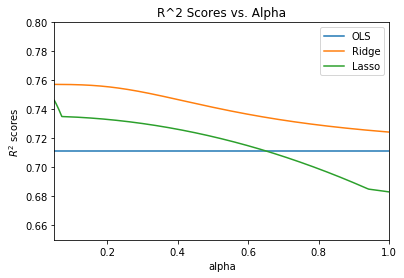

In [15]:
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

x = np.linspace(0.05,1,1000).tolist()
y1 = [ols.score(X_test, y_test)] * 1000
y2 = []
y3 = []
for xi in x:
    ridge.set_params("alpha", xi)
    ridge.fit(X_test, y_test)
    y2.append(ridge.score(X_test, y_test))
    lasso.set_params("alpha", xi)
    lasso.fit(X_test, y_test)
    y3.append(lasso.score(X_test, y_test))

plt.plot(x, y1, label="OLS")
plt.plot(x, y2, label="Ridge")
plt.plot(x, y3, label="Lasso")

plt.xlim(0.05,1)
plt.ylim(0.65,0.8)
plt.title("R^2 Scores vs. Alpha")
plt.xlabel("alpha")
plt.ylabel("$R^2$ scores")
plt.legend()

## Check results with sklearn (ignore below)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

linear_regression = LinearRegression(fit_intercept=True)
ridge_regression = Ridge(alpha=0.1, fit_intercept=True)
lasso_regression = Lasso(alpha=0.1, fit_intercept=True)

linear_regression.fit(X_train, y_train)
print(linear_regression.score(X_train, y_train))
print(linear_regression.score(X_test, y_test))

ridge_regression.fit(X_train, y_train)
print(ridge_regression.score(X_train, y_train))
print(ridge_regression.score(X_test, y_test))

lasso_regression.fit(X_train, y_train)
print(lasso_regression.score(X_train, y_train))
print(lasso_regression.score(X_test, y_test))

0.74350203712
0.710920358633
0.743440055278
0.710019625087
0.733479182858
0.691503977436


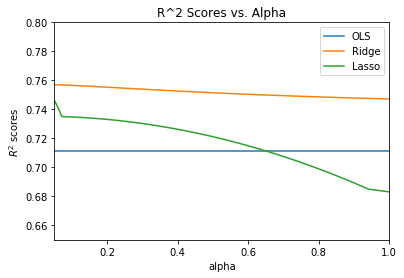

In [17]:
x = np.linspace(0.05,1,1000).tolist()
y1 = [linear_regression.score(X_test,y_test)] * 1000
y2 = []
y3 = []

for xi in x:
    ridge_regression.set_params(alpha=xi)
    ridge_regression.fit(X_test, y_test)
    y2.append(ridge_regression.score(X_test, y_test))
    lasso_regression.set_params(alpha=xi)
    lasso_regression.fit(X_test, y_test)
    y3.append(lasso_regression.score(X_test, y_test))


plt.plot(x, y1, label="OLS")
plt.plot(x, y2, label="Ridge")
plt.plot(x, y3, label="Lasso")

plt.xlim(0.05,1)
plt.ylim(0.65,0.8)
plt.title("R^2 Scores vs. Alpha")
plt.xlabel("alpha")
plt.ylabel("$R^2$ scores")
plt.legend()